In [1]:
import os
import numpy as np
import pandas as pd

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Globally setting print options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
data = pd.read_csv('preprocessed_data.csv')
data.head()

,Little_interest_in_doing_things,Feeling_down_or_depressed,Trouble_sleeping_or_sleeping_too_much,Feeling_tired_or_having_little_energy,Poor_appetite_or_overeating,Feeling_bad_about_yourself,Trouble_concentrating_on_things,Moving_or_speaking_slowly_or_too_fast,Thought_you_would_be_better_off_dead,No_of_hours_you_sleep,How_often_do_you_snore,How_often_do_you_snort/stop_breathing,trouble_sleeping,Sleep_Apnea,Blood_pressure,Taking_Medication_for_HBP,current_drinker,past_drinker,current_smoker,past_smoker,Gender,Age,Education_Level,Pregnant,PIR,Race_Non-Hispanic Black,Race_Non-Hispanic White,Race_Other Hispanic,Marital_Status_Married/Living with Partner,Marital_Status_Never Married,depression_category
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0,2,85,3,0.0,1.99,0,1,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0,0,2,44,3,0.0,4.65,0,1,0,1,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,3.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0,0,1,70,4,0.0,5.00,0,1,0,1,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0,0,1,73,2,0.0,2.15,0,1,0,1,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0,0,1,21,2,0.0,0.46,0,1,0,0,1,0


In [3]:
data.shape

(24108, 31)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24108 entries, 0 to 24107
Data columns (total 31 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Little_interest_in_doing_things             24108 non-null  float64
 1   Feeling_down_or_depressed                   24108 non-null  float64
 2   Trouble_sleeping_or_sleeping_too_much       24108 non-null  float64
 3   Feeling_tired_or_having_little_energy       24108 non-null  float64
 4   Poor_appetite_or_overeating                 24108 non-null  float64
 5   Feeling_bad_about_yourself                  24108 non-null  float64
 6   Trouble_concentrating_on_things             24108 non-null  float64
 7   Moving_or_speaking_slowly_or_too_fast       24108 non-null  float64
 8   Thought_you_would_be_better_off_dead        24108 non-null  float64
 9   No_of_hours_you_sleep                       24108 non-null  float64
 10  How_often_

In [5]:
# Check for duplicates

data.duplicated().sum()

27

In [6]:
# Remove duplicate rows
data = data.drop_duplicates()

In [7]:
data.duplicated().sum()

0

In [8]:
# Check for missing values
data.isnull().sum()

Little_interest_in_doing_things               0
Feeling_down_or_depressed                     0
Trouble_sleeping_or_sleeping_too_much         0
Feeling_tired_or_having_little_energy         0
Poor_appetite_or_overeating                   0
Feeling_bad_about_yourself                    0
Trouble_concentrating_on_things               0
Moving_or_speaking_slowly_or_too_fast         0
Thought_you_would_be_better_off_dead          0
No_of_hours_you_sleep                         0
How_often_do_you_snore                        0
How_often_do_you_snort/stop_breathing         0
trouble_sleeping                              0
Sleep_Apnea                                   0
Blood_pressure                                0
Taking_Medication_for_HBP                     0
current_drinker                               0
past_drinker                                  0
current_smoker                                0
past_smoker                                   0
Gender                                  

### Split data into X and y

In [9]:
y = data['depression_category']
X = data.drop(columns=['depression_category'])

In [10]:
X.shape, y.shape

((24081, 30), (24081,))

### Handling class imbalance - Finding the best oversampling technique

In [11]:
data['depression_category'].value_counts()

depression_category
0    18628
1     3303
2     2150
Name: count, dtype: int64

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# models
def models(X_train,y_train,model):
    if model== 'Decision Tree':
        clf=DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_leaf=5)
    else:
        clf=RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=10)

    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    return y_pred

In [14]:
# Evaluation metrics
def metrics_calculation(y_actual, y_predicted, model, samp_method):
    from sklearn import metrics

    #Accuracy
    accuracy =metrics.accuracy_score(y_actual, y_predicted)

    #precision
    precision=metrics.precision_score(y_actual, y_predicted, average='weighted')

    #Recall
    recall=metrics.recall_score(y_actual, y_predicted, average='weighted')

    #f1-score
    f1_score = metrics.f1_score(y_actual,y_predicted, average='weighted')

    results={'Model':model,'Oversampling Method': samp_method,"Accuracy":accuracy,"Precision":precision,"Recall":recall,"F1-Score":f1_score}

    return results

In [15]:
# oversampling techniques

from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN, SMOTENC

def oversample_data(X, y, method='smote', sampling_strategy='auto', random_state=42):
    if method == 'smote':
        oversampler = SMOTE(sampling_strategy=sampling_strategy, random_state=random_state)
    elif method == 'borderline':
        oversampler = BorderlineSMOTE(sampling_strategy=sampling_strategy, random_state=random_state)
    elif method == 'adasyn':
        oversampler = ADASYN(sampling_strategy=sampling_strategy, random_state=random_state)
    elif method == 'smotenc':
        categorical_features = [True] * X.shape[1]
        categorical_features[1] = False
        oversampler = SMOTENC(sampling_strategy=sampling_strategy, categorical_features=categorical_features, random_state=random_state)
    else:
        raise ValueError("Invalid oversampling method")

    X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)
    return X_resampled, y_resampled

In [16]:
# Evaluting oversampling techniques

from sklearn.model_selection import train_test_split

classifiers= ['Decision Tree','Random Forest']
oversampling_methods = ['smote', 'borderline', 'adasyn','smotenc']

#Oversampling models
eval_metrics=[]
for model in classifiers:
    for samp_method in oversampling_methods:
        X_train, X_test, y_train, y_test=train_test_split(X,y)
        # Apply oversampling using the oversample_data function
        X_resampled, y_resampled= oversample_data(X_train, y_train, method=samp_method)
        y_pred=models(X_resampled, y_resampled,model)
        metrics=metrics_calculation(y_test,y_pred,model,samp_method)
        eval_metrics.append(metrics)

evaluation_df = pd.DataFrame(eval_metrics)
evaluation_df

,Model,Oversampling Method,Accuracy,Precision,Recall,F1-Score
0,Decision Tree,smote,0.936555,0.940143,0.936555,0.937929
1,Decision Tree,borderline,0.938382,0.942990,0.938382,0.939933
2,Decision Tree,adasyn,0.937884,0.940597,0.937884,0.938937
3,Decision Tree,smotenc,0.906328,0.920338,0.906328,0.911290
4,Random Forest,smote,0.958645,0.962581,0.958645,0.959412
5,Random Forest,borderline,0.963129,0.965866,0.963129,0.963777
6,Random Forest,adasyn,0.954659,0.958756,0.954659,0.955337
7,Random Forest,smotenc,0.920943,0.939261,0.920943,0.926207


<Figure size 2000x1000 with 0 Axes>

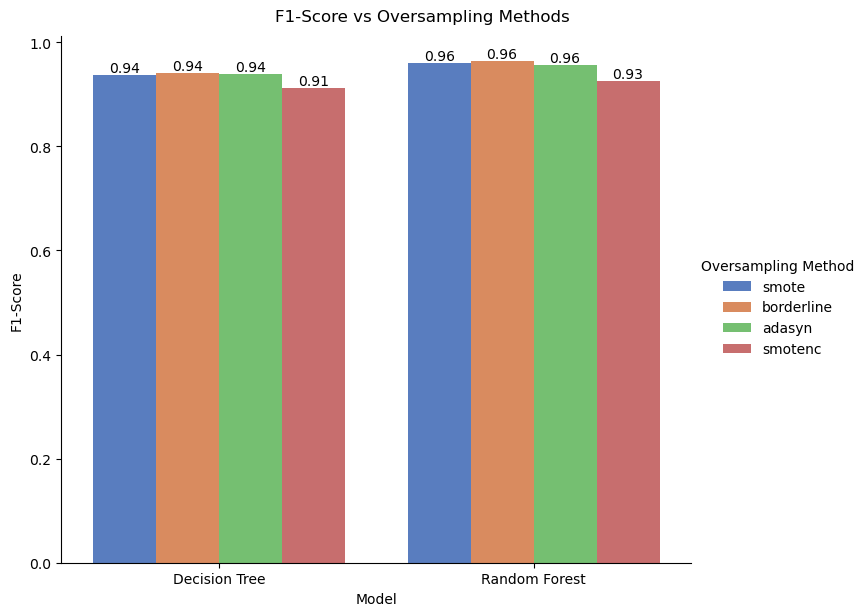

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the plot
plt.figure(figsize=(20, 10))

# Grouped bar plot using seaborn catplot
g=sns.catplot(
    x='Model',
    y='F1-Score',
    hue='Oversampling Method',
    data=evaluation_df,
    kind='bar',
    height=6,  # Set the height of each facet
    aspect=1.2,  # Adjust the width of each facet
    ci=None,  # Disable error bars for clarity
    palette='muted',  # Choose a color palette
    dodge=True,  # Separate bars for each classifier within each oversampling method
)

# Customize the plot
g.fig.suptitle('F1-Score vs Oversampling Methods', y=1.02)
for ax in g.axes.flat:
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{p.get_height():.2f}',
                ha='center', va='bottom', color='black', fontsize=10)
plt.xlabel('Model')
plt.ylabel('F1-Score')
#plt.legend(title='Classifier')

# Show the plot
plt.show()

In [18]:
g.savefig('evaluting_oversampling_techniques.png', format='png', bbox_inches='tight')